# Problem Statement:

<h3>Problem Statement ID: 25005 </h3>

<h3>Problem Statement Title: lmage based Animal Type Classification for cattle and buffaloes</h3>
<h5>Description:</h5>
<p>Background: In dairy farming, evaluating the body structure of animals is vital to predict their longevity, productivity, and reproductive efficiency. Traditionally, Animal Type Classification (ATC)—which involves scoring animals for physical traits—is conducted by trained personnel through visual inspection and manual measurement of specific body parts. However, this manual method is prone to human error and subjectivity, even with trained professionals, resulting in inconsistent and potentially unreliable data.

With advances in Artificial Intelligence (AI) and image processing technologies, there is an opportunity to automate this process. Automated scoring based on images can ensure standardization, minimize observer bias, and improve the reliability of data captured for scientific and breeding purposes.

Description: The Government of India is implementing the Rashtriya Gokul Mission (RGM) since December 2014, aiming to conserve and develop indigenous bovine breeds, genetically upgrade the bovine population, and enhance milk productivity. Under this mission, Progeny Testing (PT) and Pedigree Selection (PS) programs are being carried out in key dairy breeds across the country to produce high genetic merit bulls for breeding purposes.

Animal Type Classification (ATC) is a crucial step in identifying top-performing elite dams, which are potential mothers of future breeding bulls. Currently, ATC is performed manually by a trained Animal Typer who visually examines and measures physical traits, and then records the scores in the Bharat Pashudhan App (BPA). Despite training, errors due to fatigue, bias, or measurement inaccuracies can adversely affect data quality and scientific analysis.

There is a need for an AI-driven solution that can automate this classification process by analyzing animal images, extracting body structure parameters, and assigning standardized scores with minimal human intervention. If integrated with BPA, such a solution would enhance the accuracy, efficiency, and scientific validity of animal evaluation under PT and PS programs.</p>

<h4>Expected Solution:</h4> Students are expected to develop an AI-based Auto Recording of Animal Type Classification System that can:

1) Use images of cattle and buffaloes to evaluate physical traits relevant to Animal Type Classification.
2) Extract and quantify specific body structure parameters (e.g., body length, height at withers, chest width, rump angle, etc.) using AI and image processing techniques.
3) Generate objective and consistent classification scores.
4) Auto-record and store the classification data in a structured format.
5) Provide seamless integration with BPA to auto-save the classification records at the time of evaluation.
6) Be user-friendly and operable by field personnel with minimal technical skills.
</p>
<h5>Organization:	Ministry of Fisheries, Animal Husbandry & Dairying.<br>
Department:	Department of Animal Husbandry & Dairying (DoAH&D).<br>
Category:	Software.<br>
Theme:	Agriculture, FoodTech & Rural Development.</h5>

# Objective

<p> The objective of this project is to develop an AI-powered automated Animal Type Classification (ATC) system that can replace the traditional manual and subjective method of evaluating dairy animals with a standardized, image-based solution. By using artificial intelligence and image processing, the system will automatically extract and quantify key physical traits such as body length, height at withers, chest width, and rump angle, and generate objective classification scores with minimal human intervention. The solution aims to ensure accuracy, consistency, and efficiency in animal evaluation, reducing errors caused by fatigue, bias, or measurement inaccuracies. Furthermore, by integrating seamlessly with the Bharat Pashudhan App, the system will enable real-time recording and storage of classification data in a structured format, strengthening progeny testing and pedigree selection programs under the Rashtriya Gokul Mission. Ultimately, the project seeks to enhance the reliability of scientific data, support the identification of elite dams, and contribute to the long-term goal of conserving indigenous breeds and improving milk productivity in India. </p>

# Project Description:

<p>This project focuses on designing and developing an AI-based Auto Recording Animal Type Classification (ATC) System to modernize the evaluation of dairy cattle and buffaloes under the Rashtriya Gokul Mission. Currently, ATC is conducted manually by trained personnel who visually inspect animals and record scores in the Bharat Pashudhan App. However, this manual approach is prone to subjectivity, fatigue-related errors, and inconsistencies, which can compromise the quality of data critical for progeny testing and pedigree selection programs. The proposed solution will leverage artificial intelligence and image processing to analyze photographs of animals, extract measurable body parameters such as body length, height at withers, chest width, and rump angle, and generate standardized classification scores. The system will automatically record and store this data in structured form and integrate seamlessly with the Bharat Pashudhan App to ensure real-time, accurate, and bias-free evaluations. Designed to be simple and user-friendly, the solution will empower field personnel to carry out reliable assessments without requiring advanced technical skills. By providing a more efficient, objective, and scientifically valid method of classification, this project will directly support the selection of elite dams, aid in the production of high genetic merit bulls, and contribute to the conservation of indigenous breeds and enhancement of milk productivity across India. </p>

# Data Understanding
All the libraries go hear for Data processing

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

: 

# Configuration

Folder creation, Paths etc.

In [ ]:
import os

# Get the absolute path to the current notebook's directory
root_path = os.path.abspath(os.path.dirname(__file__)) if '__file__' in globals() else os.getcwd()

# Build dataset path
dataset_path = os.path.join(root_path, "dataset", "Indian_bovine_breeds")
print("Dataset path:", dataset_path)
output_path = os.path.join(root_path, 'split')

try:
    breeds = os.listdir(dataset_path)
    print(f"Found {len(breeds)} breeds: {breeds}")
except FileNotFoundError:
    print(f"Dataset path not found: {dataset_path}")


: 

# Dataset Loading

Prefer : 'try' and 'except'

In [3]:
def split_data():
    for breed in breeds:
        breed_folder = os.path.join(dataset_path, breed)
        images = os.listdir(breed_folder)
        print(breed_folder)

        training_images, validation_test_images = train_test_split(images, test_size=0.3, random_state=42)
        validation_images, testing_images = train_test_split(validation_test_images, test_size=0.5, random_state=42)

        for split, img_list in zip(['train', 'val', 'test'], [training_images, validation_images, testing_images]):
            split_folder = os.path.join(output_path, split, breed)

            os.makedirs(split_folder, exist_ok=True)

            for img in img_list:
                src = os.path.join(breed_folder, img)
                dest = os.path.join(split_folder, img)
                shutil.copy(src, dest)

    print("Dataset has been split into train / val / test")

if not os.path.exists(output_path): 
    split_data()
else:
    print("Split directory already exists. Skipping split_data() call")

Split directory already exists. Skipping split_data() call


# Data Preprocessing

In [4]:
# IMAGE LOADING & TRANSFORMATION

from torchvision import transforms

IMAGE_SIZE = 224

train_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(), 
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(), 
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [5]:
# DATASETS & DATALOADERS

from torchvision import datasets
from torch.utils.data import DataLoader

train_dataset = datasets.ImageFolder(os.path.join(output_path, "train"), transform=train_transforms)
val_dataset = datasets.ImageFolder(os.path.join(output_path, "val"), transform=val_test_transforms)
test_dataset = datasets.ImageFolder(os.path.join(output_path, "test"), transform=val_test_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

In [6]:
# DATA QUALITY CHECK

print("Classes:", train_dataset.classes)
print("Train Size:", len(train_dataset))
print("Val Size:", len(val_dataset))
print("Test Size:", len(test_dataset))

Classes: ['Alambadi', 'Amritmahal', 'Ayrshire', 'Banni', 'Bargur', 'Bhadawari', 'Brown_Swiss', 'Dangi', 'Deoni', 'Gir', 'Guernsey', 'Hallikar', 'Hariana', 'Holstein_Friesian', 'Jaffrabadi', 'Jersey', 'Kangayam', 'Kankrej', 'Kasargod', 'Kenkatha', 'Kherigarh', 'Khillari', 'Krishna_Valley', 'Malnad_gidda', 'Mehsana', 'Murrah', 'Nagori', 'Nagpuri', 'Nili_Ravi', 'Nimari', 'Ongole', 'Pulikulam', 'Rathi', 'Red_Dane', 'Red_Sindhi', 'Sahiwal', 'Surti', 'Tharparkar', 'Toda', 'Umblachery', 'Vechur']
Train Size: 4134
Val Size: 885
Test Size: 908


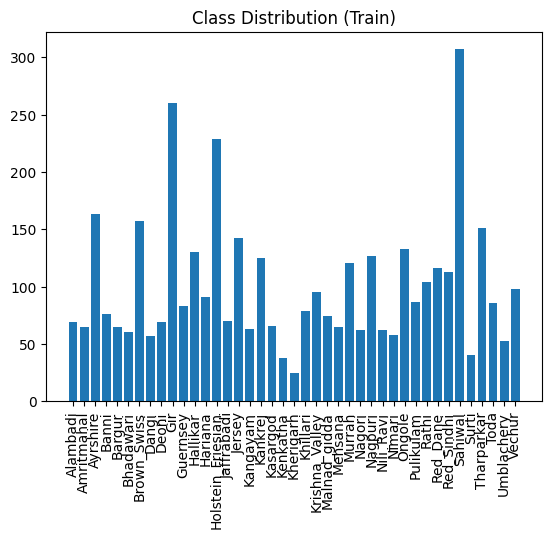

In [7]:
# CLASS DISTRIBUTION CHECK
from collections import Counter
import matplotlib.pyplot as plt

counts = Counter([label for _, label in train_dataset.samples])
plt.bar(range(len(counts)), counts.values())
plt.xticks(range(len(counts)), list(train_dataset.classes), rotation=90)
plt.title("Class Distribution (Train)")
plt.show()

# Training

Using device: cpu
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/aziz/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:53<00:00, 873kB/s] 
Epoch 1/10 [Train]:  29%|██▉       | 38/130 [01:07<02:32,  1.66s/it]/Users/aziz/Documents/GitHub/lmage-based-Animal-Type-Classification-for-cattle-and-buffaloes/.venv/lib/python3.12/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 1/10 [Train]:  65%|██████▌   | 85/130 [02:27<01:16,  1.70s/it]/Users/aziz/Documents/GitHub/lmage-based-Animal-Type-Classification-for-cattle-and-buffaloes/.venv/lib/python3.12/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 1/10 [Val]: 100%|██████████| 28/28 [00:31<00:00,  1.11s/it]


Epoch 1/10: Train Loss 2.6454, Train Acc 0.2903, Val Loss 1.9748, Val Acc 0.4271
Best model saved!


Epoch 2/10 [Train]:   9%|▉         | 12/130 [00:23<03:18,  1.68s/it]/Users/aziz/Documents/GitHub/lmage-based-Animal-Type-Classification-for-cattle-and-buffaloes/.venv/lib/python3.12/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 2/10 [Train]:  12%|█▏        | 15/130 [00:28<03:13,  1.69s/it]/Users/aziz/Documents/GitHub/lmage-based-Animal-Type-Classification-for-cattle-and-buffaloes/.venv/lib/python3.12/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 2/10 [Val]: 100%|██████████| 28/28 [00:31<00:00,  1.12s/it]


Epoch 2/10: Train Loss 1.7082, Train Acc 0.5213, Val Loss 1.6612, Val Acc 0.5356
Best model saved!


Epoch 3/10 [Train]:   6%|▌         | 8/130 [00:16<03:30,  1.73s/it]/Users/aziz/Documents/GitHub/lmage-based-Animal-Type-Classification-for-cattle-and-buffaloes/.venv/lib/python3.12/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 3/10 [Train]:  87%|████████▋ | 113/130 [03:12<00:28,  1.65s/it]/Users/aziz/Documents/GitHub/lmage-based-Animal-Type-Classification-for-cattle-and-buffaloes/.venv/lib/python3.12/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 3/10 [Val]: 100%|██████████| 28/28 [00:30<00:00,  1.10s/it]


Epoch 3/10: Train Loss 1.2753, Train Acc 0.6609, Val Loss 1.5655, Val Acc 0.5446
Best model saved!


Epoch 4/10 [Train]:  18%|█▊        | 23/130 [00:41<02:56,  1.65s/it]/Users/aziz/Documents/GitHub/lmage-based-Animal-Type-Classification-for-cattle-and-buffaloes/.venv/lib/python3.12/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 4/10 [Train]:  95%|█████████▌| 124/130 [03:29<00:09,  1.64s/it]/Users/aziz/Documents/GitHub/lmage-based-Animal-Type-Classification-for-cattle-and-buffaloes/.venv/lib/python3.12/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 4/10 [Val]: 100%|██████████| 28/28 [00:30<00:00,  1.10s/it]


Epoch 4/10: Train Loss 0.9841, Train Acc 0.7436, Val Loss 1.5295, Val Acc 0.5401


Epoch 5/10 [Train]:  52%|█████▏    | 67/130 [01:56<01:44,  1.67s/it]/Users/aziz/Documents/GitHub/lmage-based-Animal-Type-Classification-for-cattle-and-buffaloes/.venv/lib/python3.12/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 5/10 [Val]: 100%|██████████| 28/28 [00:31<00:00,  1.11s/it]


Epoch 5/10: Train Loss 0.7399, Train Acc 0.8191, Val Loss 1.4890, Val Acc 0.5672
Best model saved!


Epoch 6/10 [Train]:   0%|          | 0/130 [00:00<?, ?it/s]/Users/aziz/Documents/GitHub/lmage-based-Animal-Type-Classification-for-cattle-and-buffaloes/.venv/lib/python3.12/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 6/10 [Train]:  82%|████████▏ | 107/130 [03:02<00:38,  1.65s/it]/Users/aziz/Documents/GitHub/lmage-based-Animal-Type-Classification-for-cattle-and-buffaloes/.venv/lib/python3.12/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 6/10 [Val]: 100%|██████████| 28/28 [00:31<00:00,  1.12s/it]


Epoch 6/10: Train Loss 0.5650, Train Acc 0.8631, Val Loss 1.4579, Val Acc 0.5876
Best model saved!


Epoch 7/10 [Train]:  59%|█████▉    | 77/130 [02:14<01:27,  1.65s/it]/Users/aziz/Documents/GitHub/lmage-based-Animal-Type-Classification-for-cattle-and-buffaloes/.venv/lib/python3.12/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 7/10 [Train]:  68%|██████▊   | 88/130 [02:32<01:10,  1.67s/it]/Users/aziz/Documents/GitHub/lmage-based-Animal-Type-Classification-for-cattle-and-buffaloes/.venv/lib/python3.12/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 7/10 [Val]: 100%|██████████| 28/28 [00:30<00:00,  1.10s/it]


Epoch 7/10: Train Loss 0.4421, Train Acc 0.8996, Val Loss 1.5376, Val Acc 0.5638


Epoch 8/10 [Train]:  42%|████▏     | 55/130 [01:37<02:09,  1.73s/it]/Users/aziz/Documents/GitHub/lmage-based-Animal-Type-Classification-for-cattle-and-buffaloes/.venv/lib/python3.12/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 8/10 [Train]:  69%|██████▉   | 90/130 [02:37<01:06,  1.66s/it]/Users/aziz/Documents/GitHub/lmage-based-Animal-Type-Classification-for-cattle-and-buffaloes/.venv/lib/python3.12/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 8/10 [Val]: 100%|██████████| 28/28 [00:30<00:00,  1.10s/it]


Epoch 8/10: Train Loss 0.3617, Train Acc 0.9187, Val Loss 1.5059, Val Acc 0.5797


Epoch 9/10 [Train]:  46%|████▌     | 60/130 [01:44<01:59,  1.71s/it]/Users/aziz/Documents/GitHub/lmage-based-Animal-Type-Classification-for-cattle-and-buffaloes/.venv/lib/python3.12/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 9/10 [Train]:  92%|█████████▏| 119/130 [03:21<00:18,  1.66s/it]/Users/aziz/Documents/GitHub/lmage-based-Animal-Type-Classification-for-cattle-and-buffaloes/.venv/lib/python3.12/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 9/10 [Val]: 100%|██████████| 28/28 [00:30<00:00,  1.10s/it]


Epoch 9/10: Train Loss 0.3056, Train Acc 0.9320, Val Loss 1.5597, Val Acc 0.5672


Epoch 10/10 [Train]:   5%|▍         | 6/130 [00:13<03:58,  1.92s/it]/Users/aziz/Documents/GitHub/lmage-based-Animal-Type-Classification-for-cattle-and-buffaloes/.venv/lib/python3.12/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 10/10 [Train]:  19%|█▉        | 25/130 [00:44<02:51,  1.63s/it]/Users/aziz/Documents/GitHub/lmage-based-Animal-Type-Classification-for-cattle-and-buffaloes/.venv/lib/python3.12/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 10/10 [Val]: 100%|██████████| 28/28 [00:30<00:00,  1.10s/it]


Epoch 10/10: Train Loss 0.2484, Train Acc 0.9412, Val Loss 1.5353, Val Acc 0.5853


Testing: 100%|██████████| 29/29 [00:31<00:00,  1.07s/it]

Test Accuracy: 0.5947


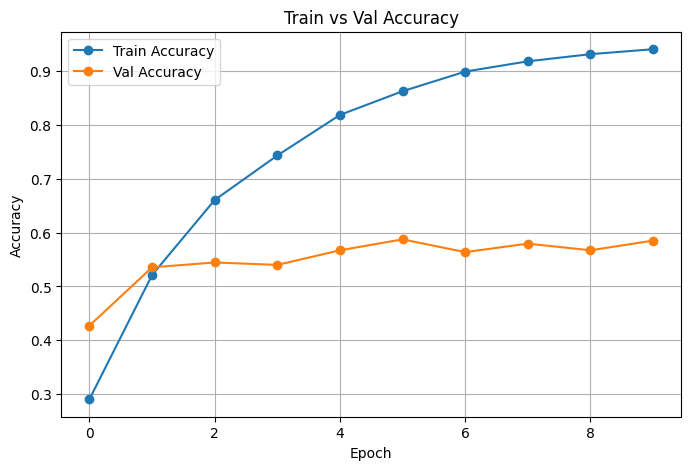

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm
from torchvision.models import resnet18, ResNet18_Weights

weights = ResNet18_Weights.IMAGENET1K_V1
  # instead of pretrained=True

# DEVICE SETUP
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# MODEL SETUP (Transfer Learning - ResNet18)
num_classes = len(train_dataset.classes)
model = resnet18(weights=weights) 

# Replace final fully-connected layer for our num_classes
model.fc = nn.Linear(model.fc.in_features, num_classes)

model = model.to(device)

# LOSS & OPTIMIZER
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


# TRAINING FUNCTION
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    best_val_acc = 0.0
    history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

    for epoch in range(num_epochs):
        model.train()
        running_loss, running_corrects = 0.0, 0

        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]"):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        history["train_loss"].append(epoch_loss)
        history["train_acc"].append(epoch_acc.item())

        # VALIDATION
        model.eval()
        val_loss, val_corrects = 0.0, 0
        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]"):
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                val_corrects += torch.sum(preds == labels.data)

        val_loss = val_loss / len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)
        history["val_loss"].append(val_loss)
        history["val_acc"].append(val_acc.item())

        print(f"Epoch {epoch+1}/{num_epochs}: "
              f"Train Loss {epoch_loss:.4f}, Train Acc {epoch_acc:.4f}, "
              f"Val Loss {val_loss:.4f}, Val Acc {val_acc:.4f}")

        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), "best_model.pth")
            print("Best model saved!")

    return model, history


# TRAIN
model, history = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)


# TEST EVALUATION
def evaluate_model(model, test_loader):
    model.eval()
    test_corrects = 0
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc="Testing"):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)

    test_acc = test_corrects.double() / len(test_loader.dataset)
    print(f"Test Accuracy: {test_acc:.4f}")


# LOAD BEST MODEL AND TEST
model.load_state_dict(torch.load("best_model.pth"))
evaluate_model(model, test_loader)


plt.figure(figsize=(8,5))
plt.plot(history["train_acc"], label="Train Accuracy", marker="o")
plt.plot(history["val_acc"], label="Val Accuracy", marker="o")
plt.title("Train vs Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
